Подключение библиотек

In [16]:
import matplotlib.pylab as plt
import numpy
%matplotlib inline

Сетка

In [17]:
y = [0, 0.00017, 0.00199, 0.01282, 0.05744]
x = [0.52360, 0.87267, 1.22173, 1.57080, 1.91986]

Поиск коэффициентов

In [18]:
diffs = []
diffs.append([y[i] for i in range(len(x))])
while len(diffs[-1]) > 1:
    diffs.append([(diffs[-1][i + 1] - diffs[-1][i]) / (x[i + len(diffs)] - x[i]) for i in range(len(diffs[-1]) - 1)])

for d in diffs:
    print(d)

[0, 0.00017, 0.00199, 0.01282, 0.05744]
[0.0004870083364368179, 0.005214003323210909, 0.03102529578594551, 0.12782902652839057]
[0.006770938058490668, 0.03697204311909616, 0.13866146812548533]
[0.028839863503251992, 0.09710694812439878]
[0.048892816969007775]


In [19]:
def add_poly(p, q):
    r = []
    for i in range(max(len(p), len(q))):
        c = 0
        if i < len(p):
            c += p[i]
        if i < len(q):
            c += q[i]
        r.append(c)
    return r

def scale_poly(d, p):
    r = []
    for i in range(len(p)):
        r.append(p[i] * d)
    return r

def mult_poly(p, q):
    r = [0 for i in range(len(p) + len(q) - 1)]
    for i in range(len(p)):
        for j in range(len(q)):
            r[i + j] += p[i] * q[j]
    return r

def eval_poly(p):
    def fun(x):
        xi = 1
        s = 0
        for i in range(len(p)):
            s += p[i] * xi
            xi *= x
        return s
    return fun

def deriv_poly(p):
    return [p[i] * i for i in range(1, len(p))]

In [20]:
poly = []
for n in range(len(x)):
    term = [1]
    for i in range(n):
        term = mult_poly(term, [-x[i], 1])
    term = scale_poly(diffs[n][0], term)
    poly = add_poly(poly, term)
print(poly)

[0.029612825801264203, -0.13999097650375614, 0.2380779044746397, -0.17596236821652778, 0.048892816969007775]


Построение интерполяционного многочлена Ньютона

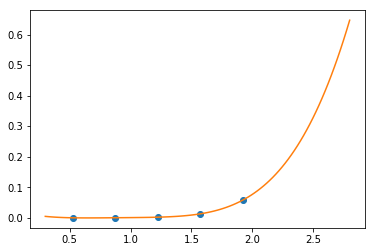

In [21]:
xgraph = numpy.linspace(0.3, 2.8, 100)
plt.plot(x, y, 'o', xgraph, [eval_poly(poly)(x) for x in xgraph])

In [22]:
def cspline(i):
    f = eval_poly(poly)
    df = eval_poly(deriv_poly(poly))
    xl = x[i]
    xr = x[i + 1]
    fl = f(xl)
    fr = f(xr)
    dfl = df(xl)
    dfr = df(xr)
    return [
        (-dfr * xl**2 * xr * (xr - xl) + fr * xl**2 * (3*xr - xl) + fl * xr**2 * (xr - 3*xl) - dfl * xl * xr**2 * (xr - xl)) / (xr - xl) ** 3,
        (dfr * xl * (2*xr + xl) * (xr - xl) - 6*(fr - fl)*xl*xr + dfl * xr * (xr + 2*xl) * (xr - xl)) / (xr - xl) ** 3,
        (-dfr * (xr - xl) * (xr + 2*xl) + 3*(fr - fl) * (xr + xl) - dfl * (xr - xl) * (xl + 2*xr)) / (xr - xl) ** 3,
        (dfr * (xr - xl) - 2*(fr - fl) + dfl * (xr - xl)) / (xr - xl) ** 3,
    ]
for i in range(4):
    print(cspline(i))

[0.019404737256784713, -0.07760397010155713, 0.09807674866621226, -0.039427221117895664]
[-0.025964241892935638, 0.07836242887417517, -0.08064682020737808, 0.02883986350325304]
[-0.15045549790786994, 0.3840545691664579, -0.3308589974253837, 0.09710694812439995]
[-0.4150450261060874, 0.8893826992975917, -0.6525604656586516, 0.16537403274554624]


In [25]:
splines = [cspline(i) for i in range(len(x) - 1)]
yin = [0, 0.00017, 0.00199, 0.01282, 0.05744]
xin = [0.52360, 0.87267, 1.22173, 1.57080, 1.91986]

def interpolated(x):
    for i in range(4):
        if x >= x[i] and x <= x[i + 1]:
            return eval_poly(splines[i])(x)
    return None

xs_ = numpy.linspace(0.5, 2.8, 100)
plt.plot(xin, yin, 'o', xs_, [eval_poly(poly)(x) for x in xs_], xs_, [interpolated(x) for x in xs_])

IndexError: invalid index to scalar variable.

(-0.005, 0.008)

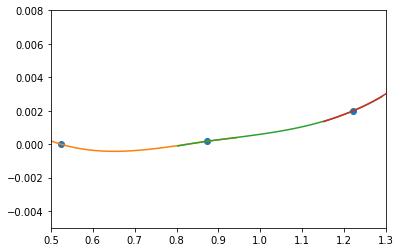

In [12]:
plt.plot(x, y, 'o')
for i in range(len(x) - 1):
    l = numpy.linspace(x[i] - 0.2*(x[i + 1] - x[i]), x[i + 1] + 0.2*(x[i + 1] - x[i]), 100)
    plt.plot(l, [eval_poly(splines[i])(x) for x in l])
plt.xlim([0.5, 1.3])
plt.ylim([-0.005, 0.008])